In [13]:
import sys, os

import numpy as np
from nptdms import TdmsFile
from dateutil.relativedelta import relativedelta
from datetime import datetime

### plotting libs
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

### some convenient magics
%load_ext autoreload
%autoreload 2

### Directory setup
cwd = os.getcwd()
datapath = os.path.abspath(os.path.join(cwd, '../../data/'))
figpath = os.path.abspath(os.path.join(cwd, 'figs/'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
filename = os.path.join(datapath, 'DOE15_SlowData_2020_02_10_14_34_59_1Hz.tdms')
tdms_file = TdmsFile(filename)


In [20]:
tdms_file.group_channels('SlowData')

[<TdmsObject with path /'SlowData'/'MS Excel Timestamp'>,
 <TdmsObject with path /'SlowData'/'LabVIEW Timestamp'>,
 <TdmsObject with path /'SlowData'/'Scan Errors'>,
 <TdmsObject with path /'SlowData'/'Late Scans'>,
 <TdmsObject with path /'SlowData'/'Hum1'>,
 <TdmsObject with path /'SlowData'/'Temp1'>,
 <TdmsObject with path /'SlowData'/'Hum2'>,
 <TdmsObject with path /'SlowData'/'Temp2'>,
 <TdmsObject with path /'SlowData'/'Windspeed_38m'>,
 <TdmsObject with path /'SlowData'/'Windspeed_55m'>,
 <TdmsObject with path /'SlowData'/'Windspeed_87m'>,
 <TdmsObject with path /'SlowData'/'WD1_87m'>,
 <TdmsObject with path /'SlowData'/'Air_Press_2'>,
 <TdmsObject with path /'SlowData'/'Air_Press_1'>,
 <TdmsObject with path /'SlowData'/'Wind_Direction_38m'>,
 <TdmsObject with path /'SlowData'/'WindSpeed_80m'>,
 <TdmsObject with path /'SlowData'/'Precipitation'>,
 <TdmsObject with path /'SlowData'/'Tower Base Bend 1'>,
 <TdmsObject with path /'SlowData'/'Tower Base Bend 2'>,
 <TdmsObject with pa

In [79]:
channels = ['LabVIEW Timestamp','Windspeed_87m','WD1_87m']
# 'WD_Nacelle',
# 'WD_Nacelle_Mod']

In [81]:
dataset = {channel: tdms_file.object('SlowData', channel) for channel in channels}

time = dataset['LabVIEW Timestamp'].data
timestamp = [datetime.fromtimestamp(x- 2082844800) for x in time]

windspeed = dataset['Windspeed_87m'].data
winddirection = dataset['WD1_87m'].data

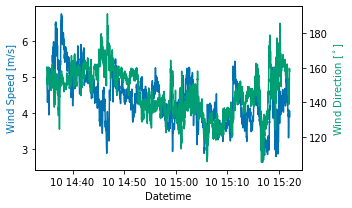

In [86]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(timestamp, windspeed, c='C0')
ax.set_xlabel('Datetime')
ax.set_ylabel('Wind Speed [m/s]', c='C0')

ax2=ax.twinx()

ax2.plot(timestamp, winddirection, c='C1')
ax2.set_ylabel('Wind Direction [$^\circ$]', c='C1')

plt.tight_layout()